## All Headlines Dataset for modeling - subsamples of dataframe
real news = 0, fake news = 1

In [2]:
import nltk
import string

import pandas            as pd
import numpy             as np
import seaborn           as sns
import matplotlib.pyplot as plt
import plotly.express    as px

from matplotlib import cm
from tqdm       import tqdm
from wordcloud  import WordCloud

from nltk.probability import FreqDist
from nltk.corpus      import stopwords
from nltk.tokenize    import sent_tokenize, word_tokenize
from nltk.stem        import PorterStemmer, WordNetLemmatizer

from sklearn         import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, make_scorer, accuracy_score

from sklearn.preprocessing           import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.model_selection         import train_test_split, GridSearchCV

from sklearn.naive_bayes   import MultinomialNB, GaussianNB
from sklearn.ensemble      import RandomForestClassifier, BaggingClassifier
from sklearn.ensemble      import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.svm           import SVC

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
tqdm.pandas()

np.random.seed(0)

[nltk_data] Downloading package stopwords to /home/jojo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jojo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jojo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/home/jojo/anaconda3/lib/python3.8/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


## All Headlines Dataset

In [14]:
df = pd.read_csv('all_headlines.csv')
df

,headline,real_or_fake
0,India Is In The Middle Of A Coronavirus YouTub...,1
1,"Tweet: False reporting on ""shooting down"" peop...",1
2,"Tweet: A woman eating a delicacy, attributing ...",1
3,Tweet: False chain message about NYPD containm...,1
4,Hoax Alert: Viral 'Emergency Notification' On ...,1
...,...,...
111923,jews to celebrate rosh hashasha or something,1
111924,internal affairs investigator disappointed con...,1
111925,the most beautiful acceptance speech this week...,0
111926,mars probe destroyed by orbiting spielberg-gat...,1


In [15]:
df.real_or_fake.value_counts()

0    61114
1    50814
Name: real_or_fake, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111928 entries, 0 to 111927
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   headline      111928 non-null  object
 1   real_or_fake  111928 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.7+ MB


## Sample of Half the All Headlines Dataset

In [17]:
df_sample_half = df.sample(frac=0.5, random_state=1)
df_sample_half

,headline,real_or_fake
95070,twitter took a much-needed break from the worl...,0
88905,new sitcom pulls back the envelope,1
73122,area man tired of making excuses for rapist fr...,1
57624,biden loses control of butterfly knife during ...,1
31058,WOW! SARCASTIC MIKE BARNICLE Gets An Earful Fr...,1
...,...,...
39278,Government costs could rise $2.3 billion witho...,0
105262,nra calls for teachers to keep loaded gun poin...,1
26270,HOW BLACK LIVES MATTER Terrorists And Cop Kill...,1
35220,Factbox: Big-ticket items at center of Congres...,0


In [18]:
df_sample_half.real_or_fake.value_counts()

0    30523
1    25441
Name: real_or_fake, dtype: int64

In [29]:
df_sample_half.reset_index(inplace=True, drop=True)
df_sample_half

,headline,real_or_fake
0,twitter took a much-needed break from the worl...,0
1,new sitcom pulls back the envelope,1
2,area man tired of making excuses for rapist fr...,1
3,biden loses control of butterfly knife during ...,1
4,WOW! SARCASTIC MIKE BARNICLE Gets An Earful Fr...,1
...,...,...
55959,Government costs could rise $2.3 billion witho...,0
55960,nra calls for teachers to keep loaded gun poin...,1
55961,HOW BLACK LIVES MATTER Terrorists And Cop Kill...,1
55962,Factbox: Big-ticket items at center of Congres...,0


## Sample of a Quarter the All Headlines Dataset

In [22]:
df_sample25 = df.sample(frac=0.25, random_state=321)
df_sample25

,headline,real_or_fake
46727,Explosion outside Athens court shatters window...,0
20765,MEGHAN MCCAIN Cut-Off After Saying the Florida...,1
80903,"in donald trump's america, people like marlee ...",0
57730,taco bell: more than just fast food,0
104138,"'i used food to make myself feel better, but i...",0
...,...,...
3048,"Wuhan Market Where Coronavirus Originated? No,...",0
67079,woman claims she had miscarriage after cop use...,0
92208,"there, like, 6 cop cars outside",1
44351,Assault rifle used in Florida shooting drives ...,0


In [23]:
df_sample25.real_or_fake.value_counts()

0    15367
1    12615
Name: real_or_fake, dtype: int64

In [31]:
df_sample25.reset_index(inplace=True, drop=True)
df_sample25

,headline,real_or_fake
0,Explosion outside Athens court shatters window...,0
1,MEGHAN MCCAIN Cut-Off After Saying the Florida...,1
2,"in donald trump's america, people like marlee ...",0
3,taco bell: more than just fast food,0
4,"'i used food to make myself feel better, but i...",0
...,...,...
27977,"Wuhan Market Where Coronavirus Originated? No,...",0
27978,woman claims she had miscarriage after cop use...,0
27979,"there, like, 6 cop cars outside",1
27980,Assault rifle used in Florida shooting drives ...,0


## Sample of 10,000 Rows of the All Headlines Dataset

In [25]:
df_sample10 = df.sample(n=10000, random_state=123)
df_sample10

,headline,real_or_fake
57849,10 notable books of 2016 on black women's history,0
93458,'breitbart' refusing to release names of mass ...,1
23858,THE VIEW WOMEN Go Off The Rails: Trump ‘has to...,1
37626,Top Democrat says he hopes U.S. Senate at turn...,0
104591,a great read for a new year,0
...,...,...
5115,Number of deaths by COVID-19 fell in the state...,0
96791,cool ashtray found,1
80167,mitch mcconnell says elections are 'not an exc...,0
103137,poor attendance at intervention a real wake-up...,1


In [26]:
df_sample10.real_or_fake.value_counts()

0    5502
1    4498
Name: real_or_fake, dtype: int64

In [32]:
df_sample10.reset_index(inplace=True, drop=True)
df_sample10

,headline,real_or_fake
0,10 notable books of 2016 on black women's history,0
1,'breitbart' refusing to release names of mass ...,1
2,THE VIEW WOMEN Go Off The Rails: Trump ‘has to...,1
3,Top Democrat says he hopes U.S. Senate at turn...,0
4,a great read for a new year,0
...,...,...
9995,Number of deaths by COVID-19 fell in the state...,0
9996,cool ashtray found,1
9997,mitch mcconnell says elections are 'not an exc...,0
9998,poor attendance at intervention a real wake-up...,1


## Sample of 5,000 Rows of the All Headlines Dataset

In [27]:
df_sample5 = df.sample(n=5000, random_state=213)
df_sample5

,headline,real_or_fake
54150,U.S. welcomes royal order to allow Saudi women...,0
29170,IT ONLY TOOK ONE TWEET FROM PRESIDENT TRUMP Fo...,1
76960,congress adds 'all your base are belong to us'...,1
41554,"Biden knocks Trump for Nazi reference, critici...",0
55579,YRC Worldwide says multiple terminals closed i...,0
...,...,...
103271,porn star doesn't want to direct,1
33782,US State Department Talking Head Transforms in...,1
78743,encyclopedic knowledge not so handsomely bound,1
64171,john deere unveils new line of lawnmower sidecars,1


In [28]:
df_sample5.real_or_fake.value_counts()

0    2665
1    2335
Name: real_or_fake, dtype: int64

In [33]:
df_sample5.reset_index(inplace=True, drop=True)
df_sample5

,headline,real_or_fake
0,U.S. welcomes royal order to allow Saudi women...,0
1,IT ONLY TOOK ONE TWEET FROM PRESIDENT TRUMP Fo...,1
2,congress adds 'all your base are belong to us'...,1
3,"Biden knocks Trump for Nazi reference, critici...",0
4,YRC Worldwide says multiple terminals closed i...,0
...,...,...
4995,porn star doesn't want to direct,1
4996,US State Department Talking Head Transforms in...,1
4997,encyclopedic knowledge not so handsomely bound,1
4998,john deere unveils new line of lawnmower sidecars,1


#### Stopwords List to be used in Vectorization

In [24]:
sw_list  = stopwords.words('english')
sw_list += list(string.punctuation)
sw_list += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘', '©', '27', '1', "'ve",
            '-', '–', '—', "n't", 'https', '2', "'re", "'m'", '3', '..', 'ca', "'s", 'amp']

### Lemmatized Data for Dataset Samples

#### Data for Half Sample

In [34]:
data_half = df_sample_half['headline']
target_half = df_sample_half['real_or_fake']

processed_data_half = [d.split() for d in data_half.to_list()]

lemmatizer = WordNetLemmatizer()
lemmatized_output_half = []

for listy in processed_data_half:
    lemmed_half = ' '.join([lemmatizer.lemmatize(w) for w in listy])
    lemmatized_output_half.append(lemmed_half)

X_lem_half = lemmatized_output_half
y_lem_half = target_half

#### Data for Quarter Sample

In [35]:
data_25 = df_sample25['headline']
target_25 = df_sample25['real_or_fake']

processed_data_25 = [d.split() for d in data_25.to_list()]

lemmatizer = WordNetLemmatizer()
lemmatized_output_25 = []

for listy in processed_data_25:
    lemmed_25 = ' '.join([lemmatizer.lemmatize(w) for w in listy])
    lemmatized_output_25.append(lemmed_25)

X_lem25 = lemmatized_output_25
y_lem25 = target_25

#### Data for 10,000 Row Sample

In [36]:
data_10 = df_sample10['headline']
target_10 = df_sample10['real_or_fake']

processed_data_10 = [d.split() for d in data_10.to_list()]

lemmatizer = WordNetLemmatizer()
lemmatized_output_10 = []

for listy in processed_data_10:
    lemmed_10 = ' '.join([lemmatizer.lemmatize(w) for w in listy])
    lemmatized_output_10.append(lemmed_10)

X_lem10 = lemmatized_output_10
y_lem10 = target_10

#### Data for 5,000 Row Sample

In [37]:
data_5 = df_sample5['headline']
target_5 = df_sample5['real_or_fake']

processed_data_5 = [d.split() for d in data_5.to_list()]

lemmatizer = WordNetLemmatizer()
lemmatized_output_5 = []

for listy in processed_data_5:
    lemmed_5 = ' '.join([lemmatizer.lemmatize(w) for w in listy])
    lemmatized_output_5.append(lemmed_5)

X_lem5 = lemmatized_output_5
y_lem5 = target_5

## TFIDF Vectorization

### Maximum Features after vectorization: 5000

#### HALF SAMPLE

In [38]:
X_train_lem_half, X_test_lem_half, y_train_lem_half, y_test_lem_half = train_test_split(X_lem_half, y_lem_half, test_size=0.20, random_state=1)

tfidf = TfidfVectorizer(stop_words=sw_list, max_features=5000)
tfidf_data_train_lem_half = tfidf.fit_transform(X_train_lem_half)
tfidf_data_test_lem_half  = tfidf.transform(X_test_lem_half)

#### Average Number Of Elements And Matrix Sparsity - Half Sample

In [40]:
non_zero_cols_half = tfidf_data_train_lem_half.nnz / float(tfidf_data_train_lem_half.shape[0])
print("Average Number of Non-Zero Elements in Vectorized Text: {}".format(non_zero_cols_half))

percent_sparse = 1 - (non_zero_cols_half / float(tfidf_data_train_lem_half.shape[1]))
print('Percentage of columns containing ZERO: {}'.format(percent_sparse))

Average Number of Non-Zero Elements in Vectorized Text: 6.928234794844878
Percentage of columns containing ZERO: 0.9986143530410311


#### Dense Data Half Sample

In [41]:
train_half = tfidf_data_train_lem_half.toarray()
test_half  = tfidf_data_test_lem_half.toarray()

#### Data Separability Half Sample

In [42]:
pca = PCA(n_components=2)
X_pca_half = pca.fit_transform(train_half)
X_pca_half = pd.DataFrame(X_pca_half, columns=['PC1', 'PC2'])
X_pca_half['Target'] = y_lem_half

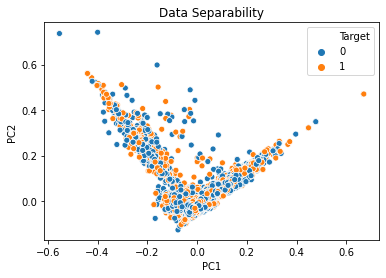

In [45]:
sns.scatterplot(x=X_pca_half['PC1'], y=X_pca_half['PC2'],
                hue=X_pca_half['Target']).set_title('Data Separability');

#### QUARTER SAMPLE

In [46]:
X_train_lem25, X_test_lem25, y_train_lem25, y_test_lem25 = train_test_split(X_lem25, y_lem25, test_size=0.20, random_state=1)

tfidf = TfidfVectorizer(stop_words=sw_list, max_features=5000)
tfidf_data_train_lem25 = tfidf.fit_transform(X_train_lem25)
tfidf_data_test_lem25  = tfidf.transform(X_test_lem25)

#### Average Number Of Elements And Matrix Sparsity - Quarter Sample

In [47]:
non_zero_cols25 = tfidf_data_train_lem25.nnz / float(tfidf_data_train_lem25.shape[0])
print("Average Number of Non-Zero Elements in Vectorized Text: {}".format(non_zero_cols25))

percent_sparse = 1 - (non_zero_cols25 / float(tfidf_data_train_lem25.shape[1]))
print('Percentage of columns containing ZERO: {}'.format(percent_sparse))

Average Number of Non-Zero Elements in Vectorized Text: 6.939468394013849
Percentage of columns containing ZERO: 0.9986121063211972


#### Dense Data Quarter Sample

In [48]:
train25 = tfidf_data_train_lem25.toarray()
test25  = tfidf_data_test_lem25.toarray()

#### Data Separability Quarter Sample

In [49]:
pca = PCA(n_components=2)
X_pca25 = pca.fit_transform(train25)
X_pca25 = pd.DataFrame(X_pca25, columns=['PC1', 'PC2'])
X_pca25['Target'] = y_lem25

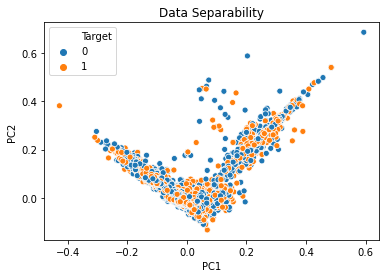

In [50]:
sns.scatterplot(x=X_pca25['PC1'], y=X_pca25['PC2'],
                hue=X_pca25['Target']).set_title('Data Separability');

#### 10,000 ROW SAMPLE

In [51]:
X_train_lem10, X_test_lem10, y_train_lem10, y_test_lem10 = train_test_split(X_lem10, y_lem10, test_size=0.20, random_state=1)

tfidf = TfidfVectorizer(stop_words=sw_list, max_features=5000)
tfidf_data_train_lem10 = tfidf.fit_transform(X_train_lem10)
tfidf_data_test_lem10  = tfidf.transform(X_test_lem10)

#### Average Number Of Elements And Matrix Sparsity - 10,000 Row Sample

In [53]:
non_zero_cols10 = tfidf_data_train_lem10.nnz / float(tfidf_data_train_lem10.shape[0])
print("Average Number of Non-Zero Elements in Vectorized Text: {}".format(non_zero_cols10))

percent_sparse = 1 - (non_zero_cols10 / float(tfidf_data_train_lem10.shape[1]))
print('Percentage of columns containing ZERO: {}'.format(percent_sparse))

Average Number of Non-Zero Elements in Vectorized Text: 7.112
Percentage of columns containing ZERO: 0.9985776


#### Dense Data 10,000 Row Sample

In [54]:
train10 = tfidf_data_train_lem10.toarray()
test10  = tfidf_data_test_lem10.toarray()

#### Data Separability 10,000 Row Sample

In [55]:
pca = PCA(n_components=2)
X_pca10 = pca.fit_transform(train10)
X_pca10 = pd.DataFrame(X_pca10, columns=['PC1', 'PC2'])
X_pca10['Target'] = y_lem10

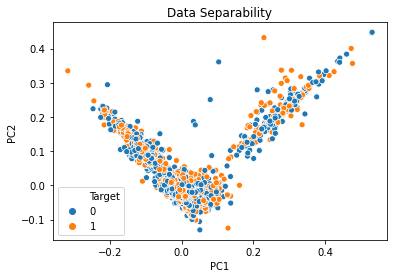

In [56]:
sns.scatterplot(x=X_pca10['PC1'], y=X_pca10['PC2'],
                hue=X_pca10['Target']).set_title('Data Separability');

#### 5,000 ROW SAMPLE

In [57]:
X_train_lem5, X_test_lem5, y_train_lem5, y_test_lem5 = train_test_split(X_lem5, y_lem5, test_size=0.20, random_state=1)

tfidf = TfidfVectorizer(stop_words=sw_list, max_features=5000)
tfidf_data_train_lem5 = tfidf.fit_transform(X_train_lem5)
tfidf_data_test_lem5  = tfidf.transform(X_test_lem5)

#### Average Number Of Elements And Matrix Sparsity - 5,000 Row Sample

In [58]:
non_zero_cols5 = tfidf_data_train_lem5.nnz / float(tfidf_data_train_lem5.shape[0])
print("Average Number of Non-Zero Elements in Vectorized Text: {}".format(non_zero_cols5))

percent_sparse = 1 - (non_zero_cols5 / float(tfidf_data_train_lem5.shape[1]))
print('Percentage of columns containing ZERO: {}'.format(percent_sparse))

Average Number of Non-Zero Elements in Vectorized Text: 7.2385
Percentage of columns containing ZERO: 0.9985523


#### Dense Data 5,000 Row Sample

In [59]:
train5 = tfidf_data_train_lem5.toarray()
test5  = tfidf_data_test_lem5.toarray()

#### Data Separability 5,000 Row Sample

In [60]:
pca = PCA(n_components=2)
X_pca5 = pca.fit_transform(train5)
X_pca5 = pd.DataFrame(X_pca5, columns=['PC1', 'PC2'])
X_pca5['Target'] = y_lem5

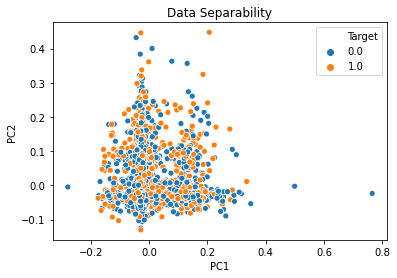

In [61]:
sns.scatterplot(x=X_pca5['PC1'], y=X_pca10['PC2'],
                hue=X_pca5['Target']).set_title('Data Separability');

## Gaussian Naive Bayes 

### Half Sample

In [62]:
gnb = GaussianNB()

gnb.fit(train_half, y_train_lem_half)


gnb_train_preds_lem_half = gnb.predict(train_half)
gnb_test_preds_lem_half  = gnb.predict(test_half)

print(classification_report(y_train_lem_half, gnb_train_preds_lem_half))
print(classification_report(y_test_lem_half, gnb_test_preds_lem_half))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82     24475
           1       0.80      0.75      0.78     20296

    accuracy                           0.80     44771
   macro avg       0.80      0.80      0.80     44771
weighted avg       0.80      0.80      0.80     44771

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      6048
           1       0.77      0.72      0.74      5145

    accuracy                           0.77     11193
   macro avg       0.77      0.77      0.77     11193
weighted avg       0.77      0.77      0.77     11193



### Quarter Sample

In [63]:
gnb = GaussianNB()

gnb.fit(train25, y_train_lem25)


gnb_train_preds_lem25 = gnb.predict(train25)
gnb_test_preds_lem25  = gnb.predict(test25)

print(classification_report(y_train_lem25, gnb_train_preds_lem25))
print(classification_report(y_test_lem25, gnb_test_preds_lem25))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85     12300
           1       0.84      0.77      0.80     10085

    accuracy                           0.83     22385
   macro avg       0.83      0.82      0.82     22385
weighted avg       0.83      0.83      0.83     22385

              precision    recall  f1-score   support

           0       0.76      0.83      0.79      3067
           1       0.76      0.68      0.72      2530

    accuracy                           0.76      5597
   macro avg       0.76      0.75      0.75      5597
weighted avg       0.76      0.76      0.76      5597



### 10,000 Row Sample

In [64]:
gnb = GaussianNB()

gnb.fit(train10, y_train_lem10)


gnb_train_preds_lem10 = gnb.predict(train10)
gnb_test_preds_lem10  = gnb.predict(test10)

print(classification_report(y_train_lem10, gnb_train_preds_lem10))
print(classification_report(y_test_lem10, gnb_test_preds_lem10))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      4383
           1       0.95      0.75      0.84      3617

    accuracy                           0.87      8000
   macro avg       0.89      0.86      0.87      8000
weighted avg       0.88      0.87      0.87      8000

              precision    recall  f1-score   support

           0       0.71      0.82      0.76      1119
           1       0.72      0.58      0.64       881

    accuracy                           0.71      2000
   macro avg       0.71      0.70      0.70      2000
weighted avg       0.71      0.71      0.71      2000



### 5,000 Row Sample

In [65]:
gnb = GaussianNB()

gnb.fit(train5, y_train_lem5)


gnb_train_preds_lem5 = gnb.predict(train5)
gnb_test_preds_lem5  = gnb.predict(test5)

print(classification_report(y_train_lem5, gnb_train_preds_lem5))
print(classification_report(y_test_lem5, gnb_test_preds_lem5))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      2122
           1       1.00      0.83      0.91      1878

    accuracy                           0.92      4000
   macro avg       0.93      0.92      0.92      4000
weighted avg       0.93      0.92      0.92      4000

              precision    recall  f1-score   support

           0       0.69      0.81      0.75       543
           1       0.72      0.57      0.64       457

    accuracy                           0.70      1000
   macro avg       0.70      0.69      0.69      1000
weighted avg       0.70      0.70      0.69      1000



## Random Forest Classifier

### Half Sample

In [66]:
rf = RandomForestClassifier(random_state=123)

rf.fit(train_half, y_train_lem_half)

rf_train_preds_lem_half = rf.predict(train_half)
rf_test_preds_lem_half = rf.predict(test_half)

print(classification_report(y_train_lem_half, rf_train_preds_lem_half))
print(classification_report(y_test_lem_half, rf_test_preds_lem_half))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24475
           1       1.00      1.00      1.00     20296

    accuracy                           1.00     44771
   macro avg       1.00      1.00      1.00     44771
weighted avg       1.00      1.00      1.00     44771

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      6048
           1       0.87      0.81      0.84      5145

    accuracy                           0.86     11193
   macro avg       0.86      0.85      0.86     11193
weighted avg       0.86      0.86      0.86     11193



### Quarter Sample

In [67]:
rf = RandomForestClassifier(random_state=123)

rf.fit(train25, y_train_lem25)

rf_train_preds_lem25 = rf.predict(train25)
rf_test_preds_lem25 = rf.predict(test25)

print(classification_report(y_train_lem25, rf_train_preds_lem25))
print(classification_report(y_test_lem25, rf_test_preds_lem25))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12300
           1       1.00      1.00      1.00     10085

    accuracy                           1.00     22385
   macro avg       1.00      1.00      1.00     22385
weighted avg       1.00      1.00      1.00     22385

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      3067
           1       0.83      0.76      0.79      2530

    accuracy                           0.82      5597
   macro avg       0.82      0.81      0.82      5597
weighted avg       0.82      0.82      0.82      5597



### 10,000 Row Sample

In [68]:
rf = RandomForestClassifier(random_state=123)

rf.fit(train10, y_train_lem10)

rf_train_preds_lem10 = rf.predict(train10)
rf_test_preds_lem10 = rf.predict(test10)

print(classification_report(y_train_lem10, rf_train_preds_lem10))
print(classification_report(y_test_lem10, rf_test_preds_lem10))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4383
           1       1.00      1.00      1.00      3617

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

              precision    recall  f1-score   support

           0       0.78      0.86      0.82      1119
           1       0.79      0.69      0.74       881

    accuracy                           0.78      2000
   macro avg       0.79      0.77      0.78      2000
weighted avg       0.78      0.78      0.78      2000



### 5,000 Row Sample

In [69]:
rf = RandomForestClassifier(random_state=123)

rf.fit(train5, y_train_lem5)

rf_train_preds_lem5 = rf.predict(train5)
rf_test_preds_lem5 = rf.predict(test5)

print(classification_report(y_train_lem5, rf_train_preds_lem5))
print(classification_report(y_test_lem5, rf_test_preds_lem5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2122
           1       1.00      1.00      1.00      1878

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

              precision    recall  f1-score   support

           0       0.73      0.87      0.79       543
           1       0.80      0.61      0.69       457

    accuracy                           0.75      1000
   macro avg       0.77      0.74      0.74      1000
weighted avg       0.76      0.75      0.75      1000



## SVM

### Half Sample

In [70]:
svc = SVC(kernel='sigmoid', C=100)

svc.fit(train_half, y_train_lem_half)
svc_train_preds_lem_half = svc.predict(train_half)
svc_test_preds_lem_half = svc.predict(test_half)

print(classification_report(y_train_lem_half, svc_train_preds_lem_half))
print(classification_report(y_test_lem_half, svc_test_preds_lem_half))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70     24475
           1       0.64      0.64      0.64     20296

    accuracy                           0.67     44771
   macro avg       0.67      0.67      0.67     44771
weighted avg       0.67      0.67      0.67     44771

              precision    recall  f1-score   support

           0       0.76      0.78      0.77      6048
           1       0.74      0.71      0.72      5145

    accuracy                           0.75     11193
   macro avg       0.75      0.75      0.75     11193
weighted avg       0.75      0.75      0.75     11193



### Quarter Sample

In [71]:
svc = SVC(kernel='sigmoid', C=100)

svc.fit(train25, y_train_lem25)
svc_train_preds_lem25 = svc.predict(train25)
svc_test_preds_lem25 = svc.predict(test25)

print(classification_report(y_train_lem25, svc_train_preds_lem25))
print(classification_report(y_test_lem25, svc_test_preds_lem25))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74     12300
           1       0.68      0.68      0.68     10085

    accuracy                           0.71     22385
   macro avg       0.71      0.71      0.71     22385
weighted avg       0.71      0.71      0.71     22385

              precision    recall  f1-score   support

           0       0.76      0.78      0.77      3067
           1       0.73      0.71      0.72      2530

    accuracy                           0.75      5597
   macro avg       0.75      0.74      0.75      5597
weighted avg       0.75      0.75      0.75      5597



### 10,000 Row Sample

In [72]:
svc = SVC(kernel='sigmoid', C=100)

svc.fit(train10, y_train_lem10)
svc_train_preds_lem10 = svc.predict(train10)
svc_test_preds_lem10 = svc.predict(test10)

print(classification_report(y_train_lem10, svc_train_preds_lem10))
print(classification_report(y_test_lem10, svc_test_preds_lem10))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      4383
           1       0.80      0.81      0.80      3617

    accuracy                           0.82      8000
   macro avg       0.82      0.82      0.82      8000
weighted avg       0.82      0.82      0.82      8000

              precision    recall  f1-score   support

           0       0.77      0.74      0.75      1119
           1       0.68      0.72      0.70       881

    accuracy                           0.73      2000
   macro avg       0.73      0.73      0.73      2000
weighted avg       0.73      0.73      0.73      2000



### 5,000 Row Sample

In [73]:
svc = SVC(kernel='sigmoid', C=100)

svc.fit(train5, y_train_lem5)
svc_train_preds_lem5 = svc.predict(train5)
svc_test_preds_lem5 = svc.predict(test5)

print(classification_report(y_train_lem5, svc_train_preds_lem5))
print(classification_report(y_test_lem5, svc_test_preds_lem5))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2122
           1       0.93      0.93      0.93      1878

    accuracy                           0.94      4000
   macro avg       0.93      0.93      0.93      4000
weighted avg       0.93      0.94      0.93      4000

              precision    recall  f1-score   support

           0       0.72      0.72      0.72       543
           1       0.67      0.67      0.67       457

    accuracy                           0.70      1000
   macro avg       0.69      0.69      0.69      1000
weighted avg       0.70      0.70      0.70      1000



# GridSearch - RFC and GNB 10,000 Rows

### Sample of 10000 Rows of the All Headlines Dataset

In [ ]:
df_sample10 = df.sample(n=10000, random_state=123)

df_sample10.reset_index(inplace=True, drop=True)

df_sample10.real_or_fake.value_counts()

## Data Instantiation and Lemmatization

In [ ]:
data10 = df_sample10['headline']
target10 = df_sample10['real_or_fake']

processed_data10 = [d.split() for d in data10.to_list()]

lemmatizer = WordNetLemmatizer()
lemmatized_output = []

for listy in processed_data10:
    lemmed = ' '.join([lemmatizer.lemmatize(w) for w in listy])
    lemmatized_output.append(lemmed)

### Lemmatized Data

In [ ]:
X_lem10 = lemmatized_output
y_lem10 = target10

## TFIDF Vectorization - 10000 Row Sample
### Keeping all rows but Maximum Features after vectorization: 5000

In [ ]:
X_train_lem10, X_test_lem10, y_train_lem10, y_test_lem10 = train_test_split(X_lem10, y_lem10, test_size=0.20, random_state=1)

tfidf10 = TfidfVectorizer(stop_words=sw_list, max_features=5000)
tfidf_data_train_lem10 = tfidf10.fit_transform(X_train_lem10)
tfidf_data_test_lem10  = tfidf10.transform(X_test_lem10)

#### Average Number Of Elements And Matrix Sparsity

In [ ]:
non_zero_cols10 = tfidf_data_train_lem10.nnz / float(tfidf_data_train_lem10.shape[0])
print("Average Number of Non-Zero Elements in Vectorized Text: {}".format(non_zero_cols10))

percent_sparse10 = 1 - (non_zero_cols10 / float(tfidf_data_train_lem10.shape[1]))
print('Percentage of columns containing ZERO: {}'.format(percent_sparse10))

### Dense Data - 10000 Rows Sample

In [ ]:
train10 = tfidf_data_train_lem10.toarray()
test10  = tfidf_data_test_lem10.toarray()

## Gaussian Naive Bayes GridSearch

In [ ]:
gnb_params = {'var_smoothing': np.logspace(0,-9,num=100)}

gnb_grid = GridSearchCV(estimator=GaussianNB(), param_grid=gnb_params, verbose=1, cv=5, n_jobs=-1)

gnb_grid.fit(train10, y_train_lem10)

gnb_grid_train_preds = gnb_grid.predict(train10)
gnb_grid_test_preds = gnb_grid.predict(test10)

print(classification_report(y_train_lem10, gnb_grid_train_preds))
print(classification_report(y_test_lem10, gnb_grid_test_preds))

In [ ]:
print('\033[1m' + 'Gaussian Naive Bayes Train Data Confusion Matrix:\n')
plot_confusion_matrix(gnb_grid, train10, y_train_lem10, cmap=plt.cm.Blues)
plt.show()
print('\033[1m' + 'Gaussian Naive Bayes Test Data Confusion Matrix:\n')
plot_confusion_matrix(gnb_grid, test10, y_test_lem10, cmap=plt.cm.Blues)
plt.show()

## Random Forest GridSearch 

In [ ]:
rf_params = {'n_estimators': [100,200], 'criterion':['gini', 'entropy'],
           'oob_score':['True', 'False'], 'max_depth':[10,15,20]}

rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, scoring='f1_weighted',
                      return_train_score=True, verbose=1, n_jobs=-1)

rf_grid.fit(train10, y_train_lem10)

rf_grid_train_preds = rf_grid.predict(train10)
rf_grid_test_preds = rf_grid.predict(test10)

print('\033[1m' + 'Random Forest Classifier Train Report:\n' + '\033[0m')
print(classification_report(y_train_lem10, rf_grid_train_preds))
print('\033[1m' + 'Random Forest Classifier Test Report:\n' + '\033[0m')
print(classification_report(y_test_lem10, rf_grid_test_preds))

In [ ]:
print('\033[1m' + 'Random Forest Classifier Train Data Confusion Matrix:\n')
plot_confusion_matrix(rf_grid, tfidf_data_train_lem10, y_train_lem10, cmap=plt.cm.Blues)
plt.show()
print('\033[1m' + 'Random Forest Classifier Test Data Confusion Matrix:\n')
plot_confusion_matrix(rf_grid, tfidf_data_test_lem10, y_test_lem10, cmap=plt.cm.Blues)
plt.show()